In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [3]:
np.set_printoptions(precision=3, suppress=True)

fn = '1인당_연간_양곡소비량_20230324202551.csv'

pd_data = pd.read_csv(fn, encoding='cp949')
np_data = pd_data.to_numpy()

# print(np_data)

np_data = np_data[1:, 1:].astype(np.float64)
print(np_data)

[[2011.    69.8  107.7   67.2]
 [2012.    68.6  105.4   66.2]
 [2013.    66.   101.6   63.1]
 [2014.    64.    99.    61.2]
 [2015.    61.9   96.3   59.4]
 [2016.    61.    94.7   59. ]
 [2017.    61.1   92.3   59.3]
 [2018.    60.5   91.7   58.8]
 [2019.    58.6   90.3   56.9]
 [2020.    57.1   88.8   55.5]
 [2021.    56.5   87.4   54.9]
 [2022.    56.5   87.4   54.9]]


In [4]:
np_data_sum = np_data[:,2]+np_data[:,3]

# dimension 추가 방법
# __[:, np.newaxis]
# .expand_dims()

# print(np_data_sum[:, np.newaxis].shape)
np_data_sum = np_data_sum[:, np.newaxis]

# print(np_data)

print(np.concatenate((np_data, np_data_sum), 1))

np_data = np.concatenate((np_data, np_data_sum), 1)


# 차이를 보고 싶은 경우
# np_data_sub = np_data[:,2]-np_data[:,3]
# np_data_sub = np_data_sub[:, np.newaxis]

# print(np.concatenate((np_data, np_data_sub), 1))

# np_data = np.concatenate((np_data, np_data_sub), 1)

[[2011.    69.8  107.7   67.2  174.9]
 [2012.    68.6  105.4   66.2  171.6]
 [2013.    66.   101.6   63.1  164.7]
 [2014.    64.    99.    61.2  160.2]
 [2015.    61.9   96.3   59.4  155.7]
 [2016.    61.    94.7   59.   153.7]
 [2017.    61.1   92.3   59.3  151.6]
 [2018.    60.5   91.7   58.8  150.5]
 [2019.    58.6   90.3   56.9  147.2]
 [2020.    57.1   88.8   55.5  144.3]
 [2021.    56.5   87.4   54.9  142.3]
 [2022.    56.5   87.4   54.9  142.3]]


In [5]:
np_div_y = np_data[:,2]/np_data[:,-1]
np_div_y = np_div_y[:, np.newaxis]
np_div_n = np_data[:,3]/np_data[:,-1]
np_div_n = np_div_n[:, np.newaxis]

# print(np_div_y.shape, np_div_n.shape)

np_data = np.concatenate((np_data, np_div_y, np_div_n), 1)

print(np_data)

[[2011.      69.8    107.7     67.2    174.9      0.616    0.384]
 [2012.      68.6    105.4     66.2    171.6      0.614    0.386]
 [2013.      66.     101.6     63.1    164.7      0.617    0.383]
 [2014.      64.      99.      61.2    160.2      0.618    0.382]
 [2015.      61.9     96.3     59.4    155.7      0.618    0.382]
 [2016.      61.      94.7     59.     153.7      0.616    0.384]
 [2017.      61.1     92.3     59.3    151.6      0.609    0.391]
 [2018.      60.5     91.7     58.8    150.5      0.609    0.391]
 [2019.      58.6     90.3     56.9    147.2      0.613    0.387]
 [2020.      57.1     88.8     55.5    144.3      0.615    0.385]
 [2021.      56.5     87.4     54.9    142.3      0.614    0.386]
 [2022.      56.5     87.4     54.9    142.3      0.614    0.386]]


In [6]:
# diff test
a1 = np.array([2,5,3,8,7])
np.diff(a1)

array([ 3, -2,  5, -1])

In [7]:
print(np.diff(np_data, axis=0))

[[ 1.    -1.2   -2.3   -1.    -3.3   -0.002  0.002]
 [ 1.    -2.6   -3.8   -3.1   -6.9    0.003 -0.003]
 [ 1.    -2.    -2.6   -1.9   -4.5    0.001 -0.001]
 [ 1.    -2.1   -2.7   -1.8   -4.5    0.001 -0.001]
 [ 1.    -0.9   -1.6   -0.4   -2.    -0.002  0.002]
 [ 1.     0.1   -2.4    0.3   -2.1   -0.007  0.007]
 [ 1.    -0.6   -0.6   -0.5   -1.1    0.    -0.   ]
 [ 1.    -1.9   -1.4   -1.9   -3.3    0.004 -0.004]
 [ 1.    -1.5   -1.5   -1.4   -2.9    0.002 -0.002]
 [ 1.    -0.6   -1.4   -0.6   -2.    -0.001  0.001]
 [ 1.     0.     0.     0.     0.     0.     0.   ]]


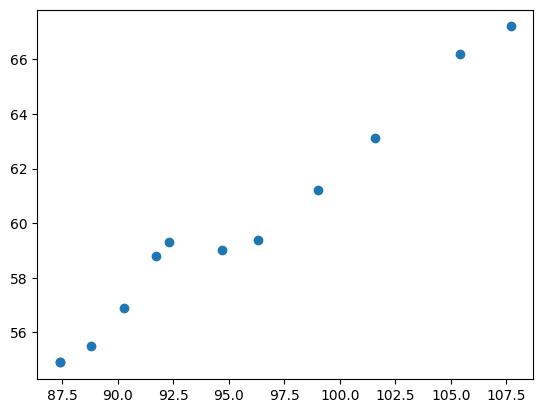

In [8]:
# print(np_data)

_, axe = plt.subplots()

axe.scatter(np_data[:,2], np_data[:,3])

# 상관도
# 회귀선

In [9]:
# 농가, 비농가 평균 구하기
y_mean = np.mean(np_data[:,2])
n_mean = np.mean(np_data[:,3])

print(y_mean, n_mean)

95.21666666666668 59.699999999999996


In [10]:
# 농가, 비농가 편차 구하기
y_deviation = np_data[:,2] - y_mean
n_deviation = np_data[:,3] - n_mean

print(y_deviation, n_deviation)

[12.483 10.183  6.383  3.783  1.083 -0.517 -2.917 -3.517 -4.917 -6.417
 -7.817 -7.817] [ 7.5  6.5  3.4  1.5 -0.3 -0.7 -0.4 -0.9 -2.8 -4.2 -4.8 -4.8]


In [11]:
# 농가, 비농가 상관도 구하기
corr = np.corrcoef(np_data[:, 2], np_data[:, 3])

print(corr)

[[1.    0.986]
 [0.986 1.   ]]


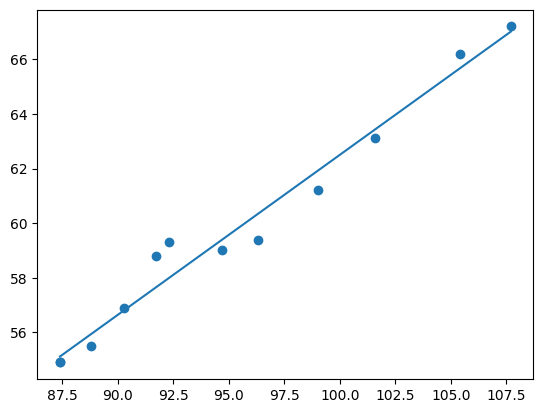

In [12]:
# 기울기, y절편 구하기

x = np_data[:, 2]
y = np_data[:, 3]

corr = np.corrcoef(x, y)[0,1]

x_std = np.std(x)
y_std = np.std(y)

x_mean = np.mean(x)
y_mean = np.mean(y)

slope = corr * (y_std/x_std)
intercept = y_mean - (slope*x_mean)
# print(slope,intercept)

_, axe = plt.subplots()
axe.scatter(x, y)

# 회귀선
axe.plot(x, x*slope+intercept)

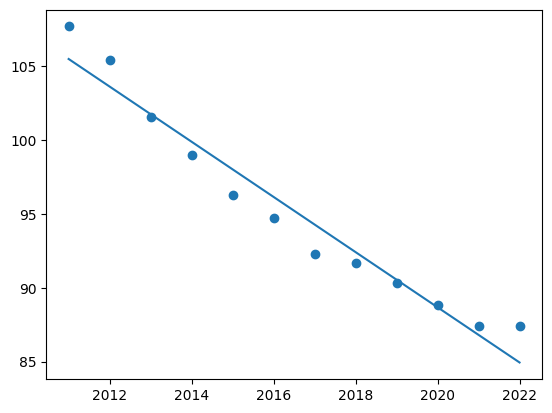

In [13]:
# 농가
y = np_data[:, 2]
x = np.arange(2011,2023)

corr = np.corrcoef(x, y)[0,1]

x_mean = np.mean(x)
y_mean = np.mean(y)

x_std = np.std(x)
y_std = np.std(y)


slope = corr * (y_std/x_std)
intercept = y_mean - slope*x_mean

farm_slope = slope
farm_intercept = intercept

_, axe = plt.subplots()
axe.scatter(np.arange(2011,2023),y)
axe.plot(x, x*slope+intercept)

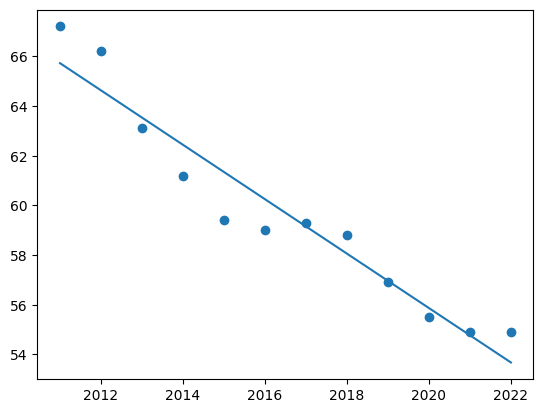

In [14]:
# 비농가
y = np_data[:,3]
x = np.arange(2011,2023)

corr = np.corrcoef(x, y)[0,1]

x_mean = np.mean(x)
y_mean = np.mean(y)

x_std = np.std(x)
y_std = np.std(y)


slope = corr * (y_std/x_std)
intercept = y_mean - slope*x_mean


city_slope = slope
city_intercept = intercept

_, axe = plt.subplots()
axe.scatter(np.arange(2011,2023),y)
axe.plot(x, x*slope+intercept)

-1.8692307692307686 -1.0951048951048954


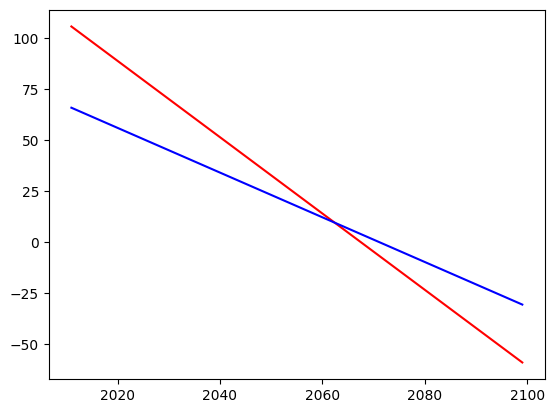

In [15]:
x = np.arange(2011, 2100)

print(farm_slope, city_slope)
_, axe = plt.subplots()
axe.plot(x, x*farm_slope+farm_intercept, c='r')
axe.plot(x, x*city_slope+city_intercept, c='b')

In [17]:
x = (city_intercept - farm_intercept)/(farm_slope - city_slope)
print(x)

2062.379704908161
